## Módulo 3. Ejercicio técnico

In [4]:
# Importo todo lo que vaya a necesitar utilizar.
# Para el tratamiento de datos:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #Para ver todas las columnas

# Imputar nulos con métodos avanzados estadísticos:
from sklearn.impute import KNNImputer

# Visualización:
import seaborn as sns
import matplotlib.pyplot as plt

## Fase 1.

### 1.1 Exploración inicial.
Revisaré ambos csv's para saber qué tipo de datos tengo e ir familiarizándome con ellos.

In [ ]:
# Primero cargo los dos csv's a utilizar.
df_fa = pd.read_csv("Customer Flight Activity.csv")
df_lh = pd.read_csv("Customer Loyalty History.csv")

In [ ]:
# Empiezo por Flight Activity.
# Las cinco primeras filas:
df_fa.head()

In [ ]:
# Las cinco últimas filas:
df_fa.tail()

In [ ]:
# Cinco filas al azar:
df_fa.sample(5)

In [ ]:
# Los nombres de las columnas:
df_fa.columns

In [ ]:
# Las medidas: (filas,columnas)
df_fa.shape

In [ ]:
#Información general:
df_fa.info()

In [ ]:
# Reviso si hay duplicados:
df_fa.duplicated().sum()

In [ ]:
# Repito el proceso con Loyalty History:
df_lh.head()

In [ ]:
df_lh.tail()

In [ ]:
df_lh.sample(5)

In [ ]:
df_lh.columns

In [ ]:
df_lh.shape

In [ ]:
df_lh.info()

In [ ]:
# Reviso si hay duplicados:
df_lh.duplicated().sum()

In [ ]:
# Parece que podría unir los dos df's por la columna 'Loyalty Number'.
# Compruebo primero si los valores son únicos:
df_lh['Loyalty Number'].value_counts()

In [ ]:
df_fa['Loyalty Number'].value_counts()

In [6]:
# En df_lh sí que son valores únicos pero en df_fa hay valores que se repiten.
# Uniré las dos tablas y después revisaré los valores repetidos para saber si son duplicados y decidir qué hacer con ellos.
df_m = df_lh.merge(df_fa, on="Loyalty Number", how="outer")

In [ ]:
# Inspecciono el df igual que hice con los csv para ver qué datos tengo:
df_m.head()

In [ ]:
df_m.tail()

In [ ]:
df_m.sample(5)

In [ ]:
df_m.columns

In [ ]:
df_m.shape

In [ ]:
# Veo su información general:
df_m.info()

In [ ]:
# Reviso si tengo los mismos duplicados o si hay más:
df_m.duplicated().sum()

In [ ]:
# Vuelvo a revisar de manera general los datos numéricos:
df_m.describe().T

In [ ]:
# Aquí los datos tipo 'object' = str.
df_m.describe(include = 'object').T

In [7]:
# Hago un pequeño bucle para que me muestre todos los datos y revisar si hay algo mal escrito:
for col in df_m.select_dtypes(include='object'):
    print(col)
    print(df_m[col].unique())
    print(f'-------------------------------------------------------------------------------')

Country
['Canada']
-------------------------------------------------------------------------------
Province
['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec' 'Manitoba'
 'Newfoundland' 'New Brunswick' 'Nova Scotia' 'Prince Edward Island'
 'Yukon']
-------------------------------------------------------------------------------
City
['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Winnipeg' 'Quebec City' 'Peace River' "St. John's" 'Tremblant'
 'Ottawa' 'Trenton' 'Thunder Bay' 'West Vancouver' 'Fredericton' 'London'
 'Halifax' 'Moncton' 'Banff' 'Kingston' 'Whistler' 'Charlottetown' 'Hull'
 'Victoria' 'Calgary' 'Kelowna' 'Whitehorse']
-------------------------------------------------------------------------------
Postal Code
['T9G 1W3' 'M1R 4K3' 'U5I 4F1' 'V5R 1W3' 'P1L 8X8' 'P1J 8T7' 'S6J 3G0'
 'H2T 9K8' 'V6E 3D9' 'M5V 1G5' 'H2Y 4R4' 'R2C 0M5' 'V6E 3Z3' 'G1B 3L5'
 'T9O 2W2' 'A1C 6H9' 'H5Y 2S9' 'K1F 2R2' 'K8V 4B2' 'R3R 3T4' 'P1W 1K4'
 'K8T 5M5'

### Primera impresión después de revisar los datos:
- En Country solo tenemos un valor: 'Canada'.
- Cambiaré la columna 'Gender' por 'Sex'.
- Debo cambiar 'Month', 'Cancellation Month' y 'Enrrollment Month' para mostrar el nombre del mes.
- Hay nulos en las columnas: 'Salary', 'Cancellation Year' y 'Cancellation Month'.
- Hay datos negativos en 'Salary'.
- Podría cambiar los espacios entre los nombres de las columnas por un '_' pero creo que en los gráficos quedará mejor como está.

## 1.2 Limpieza de datos.

In [ ]:
# Elimino los duplicados:
df_m.drop_duplicates(inplace=True)

In [ ]:
# Me aseguro de haberlos eliminado:
df_m.duplicated().sum()

In [ ]:
# Eliminaré la columna 'Country' porque siempre se trata del mismo dato, tengo en cuenta que el análisis será solamente sobre usuarios de Canadá.
# Si en el futuro necesitase esta columna podría añadirla.
df_m.drop('Country', axis=1, inplace=True)

In [ ]:
# Cambio el nombre de la columna 'Gender' a 'Sex':
df_m.rename(columns = {'Gender': 'Sex'}, inplace = True)

In [ ]:
# Reviso que se hayan aplicado ambos cambios:
df_m.columns

In [ ]:
# Inspecciono de nuevo los nulos:
df_m.isnull().sum()

In [8]:
# Ya sé que las únicas columnas con nulos son 'Salary', 'Cancellation Year' y 'Cancellation Month'.
# Dejo esto más claro para verlo en números y porcentaje redondeando a dos decimales:
n1 = df_m['Salary'].isnull().sum()
n11 = (df_m['Salary'].isnull().sum()/df_m.shape[0]*100).round(2) 
n2 = df_m['Cancellation Year'].isnull().sum()
n22 = (df_m['Cancellation Year'].isnull().sum()/df_m.shape[0]*100).round(2) 
n3 = df_m['Cancellation Month'].isnull().sum()
n33 = (df_m['Cancellation Month'].isnull().sum()/df_m.shape[0]*100).round(2) 

print(f'En la columna Salary tengo {n1} nulos, un {n11}%.')
print(f'-----------------------------------------------------')
print(f'En la columna Cancellation Year tengo {n2} nulos, un {n22}%.')
print(f'--------------------------------------------------------------')
print(f'En la columna Cancellation Month tengo {n3} nulos, un {n33}%.')
print(f'--------------------------------------------------------------')

En la columna Salary tengo 102672 nulos, un 25.31%.
-----------------------------------------------------
En la columna Cancellation Year tengo 355560 nulos, un 87.66%.
--------------------------------------------------------------
En la columna Cancellation Month tengo 355560 nulos, un 87.66%.
--------------------------------------------------------------


En cuanto a las columnas 'Cancellation Year' y 'Cancellation Month':
- Debo cambiar su tipo de dato a int.
- Es un porcentaje de nulos muy alto.
- Tengo la misma cantidad de nulos en ambas columnas: supondré que no tenemos ese dato porque esos clientes no han cancelado su tarjeta y está en uso. Cambiaré los nulos por la palabra 'Ongoing' para especificar que esas tarjetas aún están en activo.

In [ ]:
# Quiero cambiar el dato de 'Cancellation Year' y 'Cancellation Month' a int pero no puedo porque hay nulos.
# Primero rellenaré los nulos con 0 para poder cambiar el tipo de dato.
df_m['Cancellation Year'] = df_m['Cancellation Year'].fillna(0)
df_m['Cancellation Month'] = df_m['Cancellation Month'].fillna(0)

# Ahora puedo cambiar el tipo de dato
df_m['Cancellation Year'] = df_m['Cancellation Year'].astype(int)
df_m['Cancellation Month'] = df_m['Cancellation Month'].astype(int)

In [ ]:
# Ya no puedo utilizar fillna para tratar los nulos.
# Haré una función que cambie los 0 por la palabra 'Ongoing'.
# Pero primero debo cambiar el espacio en el nombre de las columnas por un "_" para poder ejecutar la función:
df_m.rename(columns = {'Cancellation Year': 'Cancellation_Year'}, inplace = True)
df_m.rename(columns = {'Cancellation Month': 'Cancellation_Month'}, inplace = True)

In [ ]:
# Hago la función para 'Cancellation Year':
def cero(Cancellation_Year):
    if Cancellation_Year == 0:
        return ('Ongoing')
    else:
        return Cancellation_Year

In [ ]:
# La adapto para 'Cancellation Month':
def cero2(Cancellation_Month):
    if Cancellation_Month == 0:
        return ('Ongoing')
    else:
        return Cancellation_Month

In [ ]:
# Aplico las funciones a las dos columnas:
df_m['Cancellation_Year'] = df_m['Cancellation_Year'].apply(cero)
df_m['Cancellation_Month'] = df_m['Cancellation_Month'].apply(cero2)

In [ ]:
# Renombro las columnas:
df_m.rename(columns = {'Cancellation_Year': 'Cancellation Year'}, inplace = True)
df_m.rename(columns = {'Cancellation_Month': 'Cancellation Month'}, inplace = True)

In [ ]:
# Reviso que se hayan aplicado correctamente los cambios:
n4 = df_m['Cancellation Year'].isnull().sum()
n5 = df_m['Cancellation Month'].isnull().sum()

print(f'En la columna Cancellation Year tengo {n4} nulos.')
print(f'-----------------------------------------------')
print(f'En la columna Cancellation Month tengo {n5} nulos.')

In [ ]:
# Voy a modificar el tipo de dato de Month a object para después cambiarlo por el nombre del mes y que se vea más claro.
# Aunque al aplicar la función ya cambiaría el tipo de dato directamente.
df_m['Month'] = df_m['Month'].astype(object)

In [ ]:
# Creo una funcion que cambie el número de mes por el nombre:
def mes(Month):
    if Month == 1:
        return ('January')
    elif Month == 2:
        return ('February')
    elif Month == 3:
        return ('March')
    elif Month == 4:
        return ('April')
    elif Month == 5:
        return ('May')
    elif Month == 6:
        return ('June')
    elif Month == 7:
        return ('July')
    elif Month == 8:
        return ('August')
    elif Month == 9:
        return ('September')
    elif Month == 10:
        return ('October')
    elif Month == 11:
        return ('November')
    elif Month == 12:
        return ('December')
    else:
        return Month

In [ ]:
# Le paso la función a la columna 'Month':
df_m['Month'] = df_m['Month'].apply(mes)

In [ ]:
# Hago lo mismo para las columnas 'Enrollment Month' y 'Cancellation Month'.
# Pero primero debo cambiar el espacio en el nombre de las columnas por un "_" para poder ejecutar la función:

df_m.rename(columns = {'Enrollment Month': 'Enrollment_Month'}, inplace = True)

df_m.rename(columns = {'Cancellation Month': 'Cancellation_Month'}, inplace = True)

In [ ]:
# Modifico la función para 'Enrollment Month':
def mes2(Enrollment_Month):
    if Enrollment_Month == 1:
        return ('January')
    elif Enrollment_Month == 2:
        return ('February')
    elif Enrollment_Month == 3:
        return ('March')
    elif Enrollment_Month == 4:
        return ('April')
    elif Enrollment_Month == 5:
        return ('May')
    elif Enrollment_Month == 6:
        return ('June')
    elif Enrollment_Month == 7:
        return ('July')
    elif Enrollment_Month == 8:
        return ('August')
    elif Enrollment_Month == 9:
        return ('September')
    elif Enrollment_Month == 10:
        return ('October')
    elif Enrollment_Month == 11:
        return ('November')
    elif Enrollment_Month == 12:
        return ('December')
    else:
        return Enrollment_Month

In [ ]:
# Hago lo mismo para 'Cancellation Month':
def mes3(Cancellation_Month):
    if Cancellation_Month == 1:
        return ('January')
    elif Cancellation_Month == 2:
        return ('February')
    elif Cancellation_Month == 3:
        return ('March')
    elif Cancellation_Month == 4:
        return ('April')
    elif Cancellation_Month == 5:
        return ('May')
    elif Cancellation_Month == 6:
        return ('June')
    elif Cancellation_Month == 7:
        return ('July')
    elif Cancellation_Month == 8:
        return ('August')
    elif Cancellation_Month == 9:
        return ('September')
    elif Cancellation_Month == 10:
        return ('October')
    elif Cancellation_Month == 11:
        return ('November')
    elif Cancellation_Month == 12:
        return ('December')
    else:
        return Cancellation_Month

In [ ]:
# Aplico ambas funciones:
df_m['Enrollment_Month'] = df_m['Enrollment_Month'].apply(mes2)

df_m['Cancellation_Month'] = df_m['Cancellation_Month'].apply(mes3)

In [ ]:
# Cambio de nuevo los nombres de las columnas:
df_m.rename(columns = {'Enrollment_Month': 'Enrollment Month'}, inplace = True)

df_m.rename(columns = {'Cancellation_Month': 'Cancellation Month'}, inplace = True)

In [ ]:
# Reviso que todo se haya ejecutado correctamente:
df_m['Month'].value_counts().to_frame().T

In [ ]:
df_m['Enrollment Month'].value_counts().to_frame().T

In [ ]:
df_m['Cancellation Month'].value_counts().to_frame().T

Continúo con la columna 'Salary':
- Hay valores negativos.
- Los valores tienen demasiados decimales.
- El porcentaje de nulos es alto, debo tratarlos con técnicas avanzadas.

In [9]:
# Considero que los valores negativos en 'Salary' deben tratarse de un error por lo que los cambiaré a positivos.
# Para esto haré una función:
def positivo(Salary):
    if Salary < 0:
        return (Salary * -1)
    else:
        return Salary

In [10]:
# Aplico la función
df_m['Salary'] = df_m['Salary'].apply(positivo)

In [11]:
# Compruebo que la función se ha ejecutado correctamente:
df_m[(df_m['Salary'] < 0)]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


Utilizaré KNNImputer para tratar los nulos porque:
- Es un porcentaje alto de nulos que debe tratarse de manera avanzada.
- 'Salary' tiene como columnas cercanas datos que están estrechamente relacionados con el salario de una persona: el lugar donde reside, su sexo, su educación y su estado civil.
- KNNImputer podrá predecir de una manera más precisa los datos al basarse en las otras columnas.

In [ ]:
# Paso el comando:
imputer_knn = KNNImputer(n_neighbors=5)
df_m['Salary'] = imputer_knn.fit_transform(df_m[['Salary']])

In [ ]:
# Por último redondearé a dos decimales:
df_m['Salary'] = df_m['Salary'].round(2)

In [ ]:
# Compruebo que todos los nulos se hayan tratado:
df_m.isnull().sum()

In [ ]:
# Reviso de nuevo que todos los datos sean del tipo correcto:
df_m.info()

In [ ]:
# Guardo el data frame en un csv con todos los datos listos para usarse:
df_m.to_csv("Flight Activity and Loyalty History.csv", index=False)

## Fase 2. Visualización.

In [12]:
# Cargo el Csv ya limpio:
df_f = pd.read_csv("Flight Activity and Loyalty History.csv")

In [ ]:
# Reviso que esté correcto:
df_f.head()

In [ ]:
df_f.sample(5)

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?

In [13]:
# Agrupo por mes y por año y después hago un recuento de vuelos reservados en cada mes.
# Añado un pequeño df para revisar los datos antes de convertirlos a gráfico
df_f1 = df_f.groupby(['Month', 'Year'])['Flights Booked'].sum().reset_index()
df_f1 = pd.DataFrame(df_f1)
df_f1

,Month,Year,Flights Booked
0,April,2017,55720
1,April,2018,56791
2,August,2017,78692
3,August,2018,90512
4,December,2017,77650
5,December,2018,88397
6,February,2017,47691
7,February,2018,48643
8,January,2017,47766
9,January,2018,49170


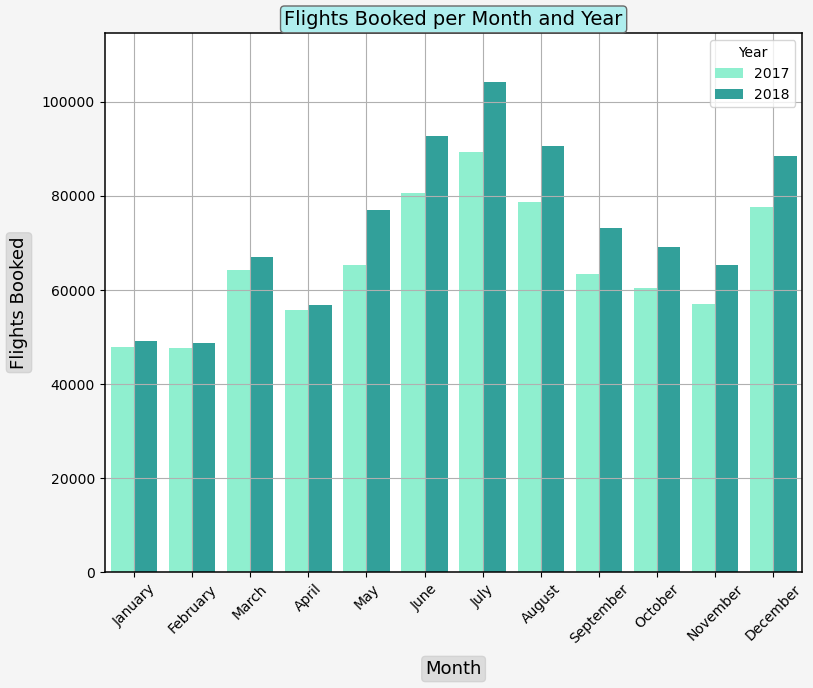

In [14]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December'] #Ordeno manualmente los meses.

plt.figure(facecolor='whitesmoke', figsize=(9,7)) #Ajusto el color de fondo y el tamaño del gráfico.

ax = sns.barplot(x='Month', y='Flights Booked', data=df_f1, 
                 palette=['aquamarine', 'lightseagreen'], hue='Year', order=order) #Creo el gráfico.

max_flights = df_f1['Flights Booked'].max()
plt.ylim(0, max_flights * 1.1) #Añado este comando para que el gráfico se ajuste a los valores de 'Flights Booked'.

plt.xticks(rotation=45) #Ajusto los meses para verlos más claros.

#Modifico el título:
plt.title("Flights Booked per Month and Year", 
          fontsize=14, fontweight='normal', 
          bbox=dict(facecolor='paleturquoise', edgecolor='dimgrey', boxstyle='round,pad=0.2'))

#Modifico las etiquetas de ambos ejes:
plt.xlabel("Month", fontsize=13, fontweight='normal', 
            labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))
plt.ylabel("Flights Booked", fontsize=13, fontweight='normal', 
            labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))

plt.grid(True) #Añado la cuadrícula enmarco.
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.1)

plt.show() #Muestro el gráfico.

- Lo primero que destaca es el aumento de vuelos en 2018 respecto a 2017, hasta abril se mantenía ligeramente por encima pero a partir del mes de mayo hay sube considerablemente la cantidad de vuelos reservados en 2018.
- Vemos tres grupos claros de cambios en reservas:
    - El primer grupo: lo forma el mes de Diciembre, que coincide con vacaciones de Navidad, y los meses de Junio, Julio y Agosto que coinciden con las vacaciones de verano.
    - El segundo grupo lo forman los meses de Marzo, Abril, Septiembre, Octubre y Noviembre.
    - El tercer grupo lo forman Enero y Febrero.
- Destaca el primer grupo llegando a duplicar las reservas del tercero y sobrepasando al segundo con un tercio.
- Dentro del segundo grupo los valores son bastante homoǵeneos siguiendo la tendecnia al aumento de reservas de Enero a Julio y descenso de Julio a Noviembre para volver a subir en Diciembre, el único mes que se aleja un poco de esta tendencia es Abril.
- Por último el tercer grupo vemos que los valores son prácticamente los mismos entre los dos meses de Enero y Febrero, donde presuponemos que la gente está recuperándose de las vacaciones de navidad.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


In [15]:
# Agrupo los datos por cliente y después sumo los puntos acumulados y la distancia.
df_f2 = df_f.groupby('Loyalty Number')[['Points Accumulated', 'Distance']].sum()
df_f2

,Points Accumulated,Distance
Loyalty Number,,
100018,5376.00,50682
100102,4115.25,40222
100140,4184.25,41252
100214,3426.00,33982
100272,4108.04,40872
...,...,...
999902,6056.50,57227
999911,0.00,0
999940,2415.00,23410


In [16]:
df_f2.describe().T

,count,mean,std,min,25%,50%,75%,max
Points Accumulated,16737.0,2997.713823,1616.039377,0.0,1822.48,3454.28,4181.0,10587.5
Distance,16737.0,29297.410826,15770.007792,0.0,17722.00,33815.00,40809.0,101959.0


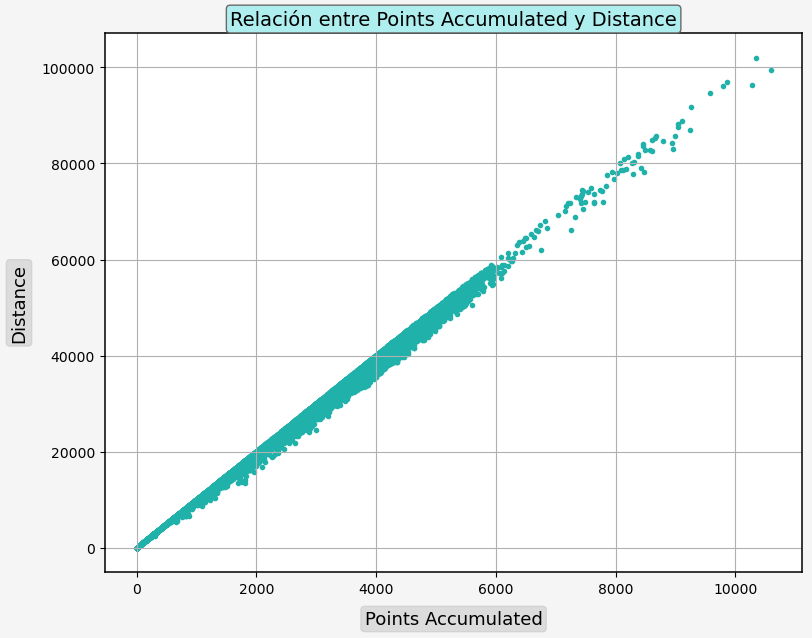

In [17]:
# Creo las dos variables a partir de mi df:
x = df_f2['Points Accumulated']
y = df_f2['Distance']

plt.figure(facecolor='whitesmoke', figsize=(9,7)) #Ajusto el color de fondo y el tamaño del gráfico.

plt.scatter(x, y, c = ['lightseagreen',], marker='.') #Creo el gráfico.

# Modifico el título:
plt.title("Relación entre Points Accumulated y Distance", 
          fontsize=14, fontweight='normal', 
          bbox=dict(facecolor='paleturquoise', edgecolor='dimgrey', boxstyle='round,pad=0.2'))

# Modifico las etiquetas de ambos ejes:
plt.xlabel("Points Accumulated", fontsize=13, fontweight='normal', 
              labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))
plt.ylabel("Distance", fontsize=13, fontweight='normal', 
              labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))

plt.grid(True) #Añado la cuadrícula y enmarco.
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.1)
    
plt.show() #Muestro el gráfico.

- En este gráfico vemos una clara relación entre la Distancia de vuelo y los puntos acumulados, a más distancia más puntos acumulados.

- Gracias a la descripción del df podemos constatar que:
    - La mayor distancia a la que han viajado ha sido: 10.1959.
    - La persona con más puntos acumulados tiene: 10587.5.
    - La media de distancia de vuelo es 2.9297.

- El gráfico nos permite observar de manera más visual a qué distancia suelen viajar los clientes, podríamos dividirla en tres grupos:
    - Vuelos de hasta 60.000. Franja en la que se acumula el mayor número de vuelos.
    - Vuelos entre 60.000 y 90.000. Donde baja considerablemente la cantidad de reservas.
    - Vuelos a partir de 90.000 límite desde el cual vemos vuelos muy puntuales.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [18]:
# Agrupo por provincia y cuento los valores únicos de 'Loyalty Number'.
# Lo hago así porque cada cliente tiene varias filas y solo queremos contar una vez cada cliente.
df_f3 = df_f.groupby('Province')['Loyalty Number'].nunique()
df_f3a = pd.DataFrame(df_f3)
df_f3a

,Loyalty Number
Province,
Alberta,969
British Columbia,4409
Manitoba,658
New Brunswick,636
Newfoundland,258
Nova Scotia,518
Ontario,5404
Prince Edward Island,66
Quebec,3300


In [19]:
# Creo un nuevo df con los valores de mi df3 ordenados de manera ascendente y añado un índice.
# Sin este índice no podría graficar el df.
df_f3_reset = df_f3.reset_index().sort_values(by='Loyalty Number', ascending=True)
df_f3_reset

,Province,Loyalty Number
7,Prince Edward Island,66
10,Yukon,110
4,Newfoundland,258
9,Saskatchewan,409
5,Nova Scotia,518
3,New Brunswick,636
2,Manitoba,658
0,Alberta,969
8,Quebec,3300
1,British Columbia,4409


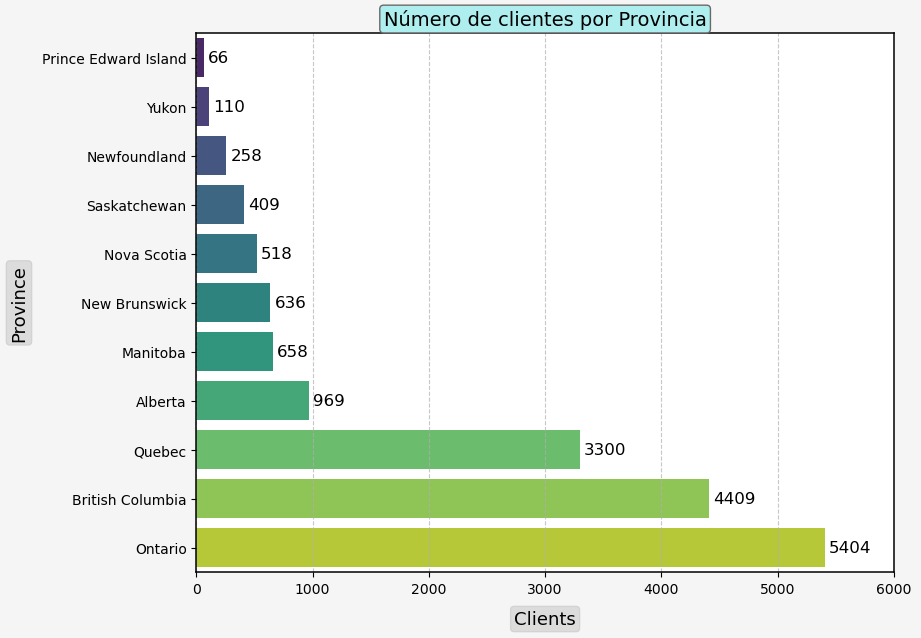

In [21]:
plt.figure(facecolor='whitesmoke', figsize=(9,7)) # Ajusto el color de fondo y el tamaño del gráfico.

# Creo el gráfico y la variable "ax" para poder añadir etiquetas.
ax = sns.barplot(x='Loyalty Number', y='Province', data=df_f3_reset, 
                 hue='Province', palette='viridis', dodge=False)
plt.legend([],[], frameon=False)

# Agrego las etiquetas con los valores de cada Provincia con un bucle:
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=12, color='black')

# Modifico el título:
plt.title("Número de clientes por Provincia", 
          fontsize=14, fontweight='normal', 
          bbox=dict(facecolor='paleturquoise', edgecolor='dimgrey', boxstyle='round,pad=0.2'))

# Modifico las etiquetas de ambos ejes:
plt.xlabel('Clients', fontsize=13, fontweight='normal', 
            labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))
plt.ylabel('Province', fontsize=13, fontweight='normal', 
            labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))


#A ñado la cuadrícula, modificada para leer mejor las etiquetas y enmarco:
plt.grid(axis='x', linestyle='--', alpha=0.7)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.1)

plt.xlim(0, 6000) #Amplio el límite para que la etiqueta de Ontario se lea correctamente.

plt.show() #Muestro el gráfico.

- Igual que en el anterior gráfico vemos claramente que hay tres provincias que destacan por su cantidad de clientes:
    - Ontario en primer puesto con 5404 clientes.
    - British Columbia en el segundo con 4409 clientes.
    - Quebec en tercer puesto con 3300 clientes.
- En el resto de provincias vemos una distribución que sube moderadamente, observamos que:
    - Alberta destaca entre todas, pasando en un tercio a su anterior
    - Manitoba y New Brunswick tienen un número muy parecido de clientes
    - La provincia con menos clientes es Prince Edward Island con 66.

- Como valores a destacar tenemos:
    - El máximo de clientes en Ontario con 5404.
    - El mínimo en Prince Edward Island con 66.

### 4. Compara el salario promedio por nivel educativo.

In [22]:
# Agrupo por 'Education', hago la media de 'Salary' y la redondeo a 2 decimales para visualizarlo mejor:
df_f4 = df_f.groupby('Education')['Salary'].mean().round(2).reset_index()
df_f4

,Education,Salary
0,Bachelor,72599.08
1,College,79371.73
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


In [23]:
# Ordeno el df por 'Salary':
df_f41 = df_f4.sort_values('Salary', ascending=False).reset_index()
df_f41.drop('index', axis=1, inplace=True)
df_f41

,Education,Salary
0,Doctor,178403.68
1,Master,103734.52
2,College,79371.73
3,Bachelor,72599.08
4,High School or Below,61146.38


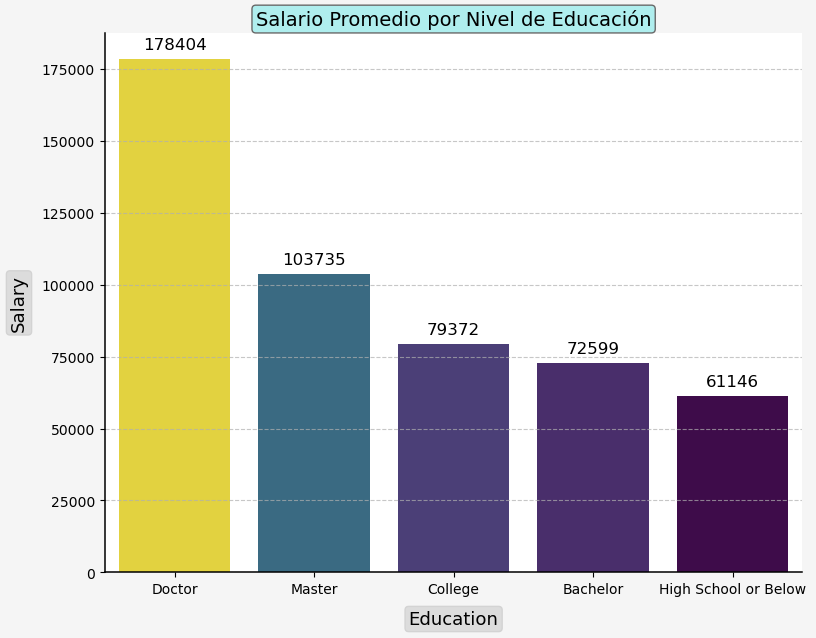

In [24]:
plt.figure(facecolor='whitesmoke', figsize=(9,7)) #Ajusto el color de fondo y el tamaño del gráfico.

# Creo el gráfico y la variable "ax" para poder añadir etiquetas:
ax = sns.barplot(x='Education', y='Salary', data=df_f41,
                 hue='Salary', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)

# Agrego las etiquetas con los valores de 'Salary' con un bucle:
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5, fontsize=12, color='black')

# Modifico el título:
plt.title("Salario Promedio por Nivel de Educación", fontsize=14, fontweight='normal', 
          bbox=dict(facecolor='paleturquoise', edgecolor='dimgrey', boxstyle='round,pad=0.2'))

# Modifico las etiquetas de ambos ejes:
plt.xlabel('Education', fontsize=13, fontweight='normal', 
              labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))
plt.ylabel('Salary', fontsize=13, fontweight='normal', 
              labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))

# Añado solamente líneas horizontales.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusto los valores del gráfico:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.1)

plt.show() #Muestro el gráfico.


- Obervamos un claro aumento de la media del salario según el nivel educativo.
    - 'Doctor' destaca con la media máxima en 178404.
    - Los demás niveles educativos siguen una tendencia mas suave:
        - 'Master' sobresale.
        - 'College' y 'Bachelor' tienen valores muy parecidos.
        - 'High School or Below' es la media mínima, pero sin alejarse demasiado del siguiente valor pero siendo menos de la mitad del valor máximo en 'Doctor'.

### 5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?



In [25]:
# Hago una variable en la que el df no tiene duplicados en 'Loyalty Number':
df_f5 = df_f.drop_duplicates(subset = 'Loyalty Number')

# Agrupo por el tipo de tarjeta y cuento cuantos clientes la tienen:
df_f5a = df_f5.groupby('Loyalty Card')['Loyalty Number'].count()

#Creo una variable con los índices del df:
df_f5a1 = df_f5a.index

# Lo paso a df para ver que esté correcto:
df_f5b = pd.DataFrame(df_f5a)
df_f5b

,Loyalty Number
Loyalty Card,
Aurora,3429
Nova,5671
Star,7637


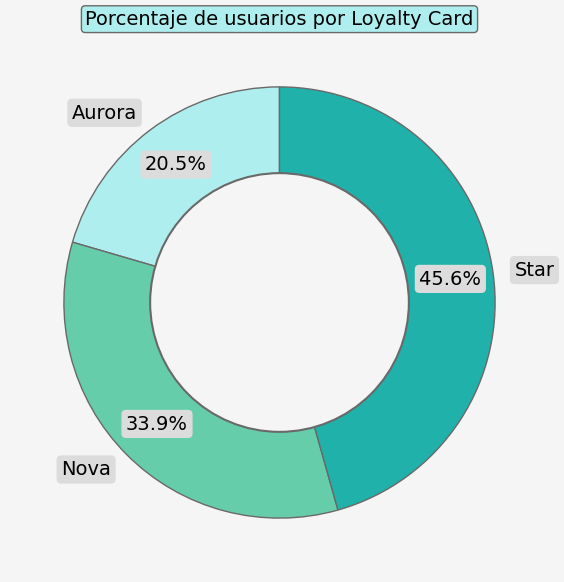

In [26]:
plt.figure(facecolor='whitesmoke', figsize=(9,7)) #Ajusto el color de fondo y el tamaño del gráfico.

# Creo el gráfico:
plt.pie(df_f5a, labels=df_f5a1, autopct='%1.1f%%', #Añado las etiquetas y los porcentajes.
        colors=['paleturquoise', 'mediumaquamarine', 'lightseagreen'], #Elijo los colores de cada variable.
        wedgeprops={'edgecolor': 'dimgray', 'linewidth': 1, 'antialiased': True}, #Elijo los colores del propio gráfico.
        textprops={'fontsize': 14, 'bbox': dict(facecolor='gainsboro', edgecolor='gainsboro', boxstyle='round,pad=0.2')}, 
        pctdistance=0.8, labeldistance=1.1, 
        startangle=90) #Modifico tanto las etiquetas como los valores.

# Añado un círculo en el medio:
centre_circle = plt.Circle((0,0), 0.60, fc='whitesmoke', edgecolor='dimgray', linewidth=1.5)
plt.gca().add_artist(centre_circle)

#Modifico el título:
plt.title("Porcentaje de usuarios por Loyalty Card", 
          fontsize=14, fontweight='normal', 
          bbox=dict(facecolor='paleturquoise', edgecolor='dimgrey', boxstyle='round,pad=0.2'))

plt.show() #Muestro el gráfico.

- Vemos que solo tenemos tres tipos de tarjeta:
    - Star destaca siendo casi la mitad del total de tarjetas.
    - L otra mitad se reparte entre Aurora y Nova con un pequeño aumento en Nova.
- Hay una preferencia clara por la tarjeta Star.

### 6. ¿Cómo se distribuyen los clientes según su estado civil y sexo?


In [27]:
# Reutilizo el df que tengo sin duplicados en 'Loyalty Number'.
# Agrupo por 'Marital Status' y 'Sex' y cuento cuantos clientes están en cada columna.
df_f6 = df_f5.groupby(['Marital Status', 'Sex'])['Loyalty Number'].count().reset_index()
df_f6a = pd.DataFrame(df_f6)
df_f6a

,Marital Status,Sex,Loyalty Number
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


In [28]:
# Ordeno por 'Loyalty Number' y cambio el nombre de la columna a 'People':
df_f62 = df_f6.sort_values('Loyalty Number', ascending=False)
df_f62.rename(columns = {'Loyalty Number': 'People'}, inplace = True)
df_f62

,Marital Status,Sex,People
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212
0,Divorced,Female,1269
1,Divorced,Male,1249


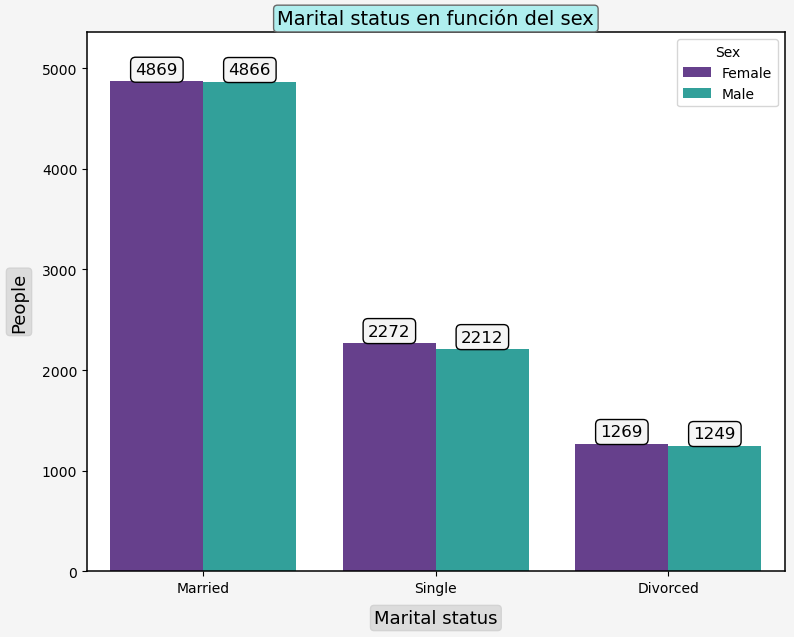

In [ ]:
plt.figure(facecolor='whitesmoke', figsize=(9,7))  #Ajusto el color de fondo y el tamaño del gráfico.

# Creo el gráfico y la variable "ax" para poder añadir etiquetas:
ax = sns.barplot(x='Marital Status', y='People', data=df_f62, 
                 palette=['rebeccapurple', 'lightseagreen'], hue='Sex')

# Obtengo el valor máximo de 'People' para ajustar los límites del gráfico:
max_p = df_f62['People'].max()
plt.ylim(0, max_p * 1.1)  #Añado este comando para que el gráfico se ajuste a los valores de 'People'.

# Modifico el título:
plt.title("Marital status en función del sex", 
          fontsize=14, fontweight='normal', 
          bbox=dict(facecolor='paleturquoise', edgecolor='dimgrey', boxstyle='round,pad=0.2'))

# Modifico las etiquetas de ambos ejes:
plt.xlabel("Marital status", fontsize=13, fontweight='normal', 
            labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))
plt.ylabel("People", fontsize=13, fontweight='normal', 
            labelpad=10, bbox=dict(facecolor='gainsboro', edgecolor='lightgray', boxstyle='round,pad=0.2'))

# Muestro etiquetas de los valores dentro de las barras con un bucle:
for container in ax.containers:
    ax.bar_label(container, fmt='%d', color='black', fontsize=12, label_type='edge', padding=3,
                 bbox=dict(facecolor='whitesmoke', edgecolor='black', boxstyle='round,pad=0.3'))  #Pongo las etiquetas encima de las barras.

# Enmarco:
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.1)

plt.show()  #Muestro el gráfico.


- El dato que más llama la atención es la cantidad de personas casadas, ya que son más que la suma de solteras y divorciadas.
- Las personas solteras casi doblan a las divorciadas.
- En todas las categorías vemos que mujeresy hombres están prácticamente igualados.
-En general hay más mujeres que hombres, lo que es lógico ya que en general hay más mujeres que hombres.